In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB


In [3]:
cleanmeta = pd.read_csv("actormetaMonths.csv")
cleanmeta = cleanmeta[['budget','revenue','popularity','runtime','castRevBudRatio','january','february','march','april','may','june','july','august','september','october','november','december']]
cleanmeta = cleanmeta.dropna()
cleanmeta = cleanmeta.reset_index()
X = cleanmeta[['budget','popularity','runtime','castRevBudRatio','january','february','march','april','may','june','july','august','september','october','november','december']].values
y = cleanmeta['revenue']/cleanmeta['budget'].values

In [4]:
for i in range(0,len(y)):
    if y[i] > 2:
        y[i] = 0 #success
    else:
        y[i] = 1 #failure

In [5]:
X_train = X[:4500]
X_test = X[4500:]

y_train = y[:4500]
y_test = y[4500:]

In [6]:
#Using Gaussian since our data is continuous
"""
var_smoothing
"""
clf = GaussianNB() #default 1e-9
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
scores = cross_val_score(clf, X_test, y_test, cv=10).mean()
p = cross_val_score(clf , X_test, y_test, cv=10, scoring='precision').mean()
r = cross_val_score(clf , X_test, y_test, cv=10, scoring='recall').mean()
f1 = cross_val_score(clf , X_test, y_test, cv=10, scoring='f1').mean()

In [7]:
clf_e8 = GaussianNB(var_smoothing=1e-8)
clf_e8.fit(X_train,y_train)
y_pred_e8 = clf_e8.predict(X_test)
scores_e8 = cross_val_score(clf_e8, X_test, y_test, cv=10).mean()
p_e8 = cross_val_score(clf_e8 , X_test, y_test, cv=10, scoring='precision').mean()
r_e8 = cross_val_score(clf_e8 , X_test, y_test, cv=10, scoring='recall').mean()
f1_e8 = cross_val_score(clf_e8 , X_test, y_test, cv=10, scoring='f1').mean()

In [8]:
clf_e7 = GaussianNB(var_smoothing=1e-7) 
clf_e7.fit(X_train,y_train)
y_pred_e7 = clf_e7.predict(X_test)
scores_e7 = cross_val_score(clf_e7, X_test, y_test, cv=10).mean()
p_e7 = cross_val_score(clf_e7 , X_test, y_test, cv=10, scoring='precision').mean()
r_e7 = cross_val_score(clf_e7 , X_test, y_test, cv=10, scoring='recall').mean()
f1_e7 = cross_val_score(clf_e7 , X_test, y_test, cv=10, scoring='f1').mean() 

In [9]:
clf_e6 = GaussianNB(var_smoothing=1e-6) 
clf_e6.fit(X_train,y_train)
y_pred_e6 = clf_e6.predict(X_test)
scores_e6 = cross_val_score(clf_e6, X_test, y_test, cv=10).mean()
p_e6 = cross_val_score(clf_e6 , X_test, y_test, cv=10, scoring='precision').mean()
r_e6 = cross_val_score(clf_e6 , X_test, y_test, cv=10, scoring='recall').mean()
f1_e6 = cross_val_score(clf_e6 , X_test, y_test, cv=10, scoring='f1').mean() 

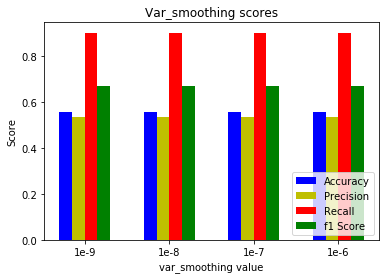

In [10]:
N =4

ind = np.arange(N)
width = 0.15
fig, ax = plt.subplots()

accu = [scores,scores_e8,scores_e7,scores_e6]
rects1 = ax.bar(ind, accu, width, color='b')
prec = [p,p_e8,p_e7,p_e6]
rects2 = ax.bar(ind+width, prec, width, color='y')
rec = [r,r_e8,r_e7,r_e6]
rects3 = ax.bar(ind + 2 * width, rec, width, color='r')
f1score = [f1,f1_e8,f1_e7,f1_e6]
rects4 = ax.bar(ind+ 3 * width, f1score,  width, color='g')

ax.set_ylabel('Score')
ax.set_xlabel('var_smoothing value')
ax.set_title('Var_smoothing scores')
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(('1e-9','1e-8','1e-7','1e-6'))
ax.legend((rects1[0], rects2[0], rects3[0],rects4[0]), ('Accuracy', 'Precision', 'Recall','f1 Score'),loc=4)

plt.show()

In [11]:
accu

[0.5550864123607246,
 0.5550864123607246,
 0.5550864123607246,
 0.5550864123607246]

all params give same accuracy
since default is one of the best, we will go with default 1e-9

In [17]:
clf = GaussianNB() #default 1e-9
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
scores = cross_val_score(clf, X_test, y_test, cv=10).mean()
p = cross_val_score(clf , X_test, y_test, cv=10, scoring='precision').mean()
r = cross_val_score(clf , X_test, y_test, cv=10, scoring='recall').mean()
f1 = cross_val_score(clf , X_test, y_test, cv=10, scoring='f1').mean() 
print(r)
print(scores)

0.900909090909091
0.5550864123607246


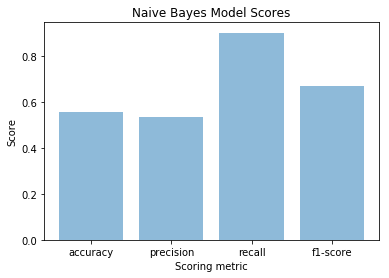

In [14]:
objects = scores,p,r,f1
y_pos = np.arange(len(objects))
 
plt.bar(y_pos, objects, align='center', alpha=0.5)
plt.xticks([0, 1, 2, 3], ["accuracy", "precision", "recall", "f1-score"])
plt.ylabel('Score')
plt.xlabel('Scoring metric')
plt.title('Naive Bayes Model Scores')

plt.show()